# MICRO CREDIT DEFAULTER MODEL:
 
SUBMITTED BY : AMAN KUMAR PATEL

BATCH : INTERNSHIP 25
    
SME : md. Kashif    

# Problem Statment:
    

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income.

The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber.

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


# importig required libraries 

In [1]:
# let's import important libraries

import pandas as pd
import numpy as np  
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# importing warings libraries to avoid libraries

import warnings
warnings.filterwarnings("ignore")

In [2]:
# let's import the dataset here with thw whole rows and columns name

pd.set_option('display.max_columns',None) # That will help to show all columns
pd.set_option("display.max_rows", None) # That will help to show all rows

# importing the whole dataset

df = pd.read_csv("Data file.csv") 
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Here we can see labsl is our target columns , and one more thing in lable "0" means that loan has not been paid and the loan"1" means that
loan has been paid. so we can say it is clearly classification problem.

# EDA :

In [3]:
# shape of data

df.shape

(209593, 37)

here we can see it is containing 209593 rows and 37 columns

In [4]:
# column name of dataset 

df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

# here we can see the the columns name of whole dataset, Features Information:

label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

msisdn : mobile number of user

aon : age on cellular network in days

daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30 : Average main account balance over last 30 days

rental90 : Average main account balance over last 90 days

last_rech_date_ma : Number of days till last recharge of main account

last_rech_date_da: Number of days till last recharge of data account

last_rech_amt_ma : Amount of last recharge of main account (in Indonesian Rupiah)

cnt_ma_rech30 : Number of times main account got recharged in last 30 days

fr_ma_rech30 : Frequency of main account recharged in last 30 days

sumamnt_ma_rech30 : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

medianamnt_ma_rech30 : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

cnt_ma_rech90 : Number of times main account got recharged in last 90 days

fr_ma_rech90 : Frequency of main account recharged in last 90 days

sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

medianamnt_ma_rech90 : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

cnt_da_rech30 : Number of times data account got recharged in last 30 days

fr_da_rech30: Frequency of data account recharged in last 30 days

cnt_da_rech90 : Number of times data account got recharged in last 90 days

fr_da_rech90 : Frequency of data account recharged in last 90 days

cnt_loans30 : Number of loans taken by user in last 30 days

amnt_loans30: Total amount of loans taken by user in last 30 days

maxamnt_loans30 : maximum amount of loan taken by the user in last 30 days

medianamnt_loans30 : Median of amounts of loan taken by the user in last 30 days

cnt_loans90 : Number of loans taken by user in last 90 days

amnt_loans90 : Total amount of loans taken by user in last 90 days

maxamnt_loans90 : maximum amount of loan taken by the user in last 90 days

medianamnt_loans90 : Median of amounts of loan taken by the user in last 90 days

payback30 : Average payback time in days over last 30 days

payback90 : Average payback time in days over last 90 days

pcircle : telecom circle

pdate : date

In [5]:
# checkiing the info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

here we can see the types of dataset is having ,

21 columns is having float. 

13 columns is having int values. 

3 is having object columns.

In [6]:
# checking the type of columns 

df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

observation:

Here we can see the 3 types of data are present in dataset.

In [7]:
# checking unique data in columns

df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

Observation:

unnamed columns which is having only full of unique data

msisdn columns which is having phone numbers of customers, and it don,t have any relation with the model building . and also havinf more than 80% unique data.

pcircle is columns which has only one unique values, means all the data are same.

after observing everything i have notice we can drop this columns. 

In [8]:
# checking the unique values of target columns

df["label"].unique()

array([0, 1])

Here we can see it This Target Columns Has only two types of data (0,1) , so it is cleat that it is binary classification problem.

and we will drop columns:

unnamed:0

msidn

pcircle

Beacause it all has so much unique values, and this olumns will also did not any help to model building.

In [9]:
# dropping the columns which is having unique values

df = df.drop(['Unnamed: 0'],axis = 1)
df = df.drop(['msisdn'],axis = 1)
df = df.drop(['pcircle'],axis =1)

In [10]:
# checking the null value

df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

observation:

Here we can see the dataset is free of null values , but for better Visualization we will take of heat map

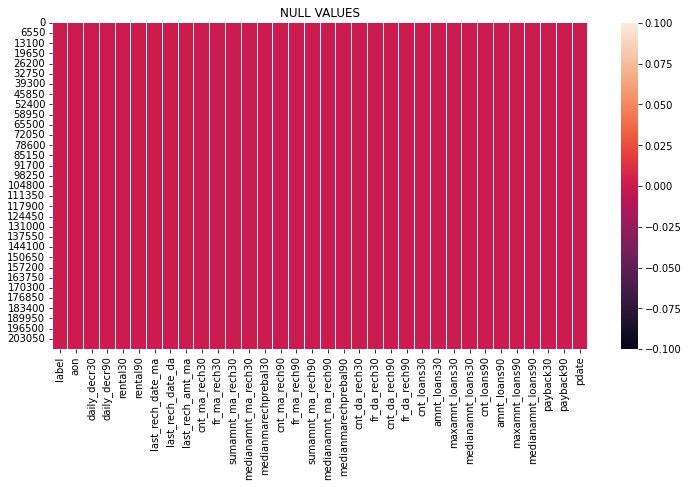

In [11]:
# taking the visualization of dataset for heatmap

plt.figure(figsize=[12,6]) 
sns.heatmap(df.isnull())
plt.title("NULL VALUES")
plt.show()

Here we can see the our dataset is free of null values and w used heatmap better visualization

In [12]:
# checking the unexpected and zero values and unwanted values in cloumns:

for j in df.columns:
    print(df[j].value_counts())
    print("-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)")

1    183431
0     26162
Name: label, dtype: int64
-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)
 95.000000        392
 92.000000        362
 96.000000        357
 99.000000        356
 157.000000       349
 94.000000        348
 130.000000       346
 108.000000       346
 93.000000        340
 98.000000        339
 133.000000       338
 104.000000       337
 101.000000       333
 102.000000       333
 156.000000       332
 144.000000       330
 103.000000       329
 119.000000       329
 131.000000       327
 107.000000       327
 169.000000       327
 126.000000       326
 137.000000       325
 117.000000       325
 136.000000       324
 146.000000       323
 113.000000       323
 159.000000       323
 97.000000        322
 145.000000       322
 100.000000       322
 147.000000       320
 118.000000       320
 110.000000       319
 106.000000       318
 120.000000       318
 183.000000       318
 134.000000       317
 112.000000       317
 124.000000       316
 122.000000       316
 123.0000

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
28.000000         74
30.000000         61
29.000000         54
32.000000         34
33.000000         30
31.000000         29
37.000000         23
34.000000         21
35.000000         20
38.000000         16
39.000000         15
36.000000         15
40.000000         11
42.000000         11
44.000000          8
41.000000          8
45.000000          7
43.000000          7
46.000000          4
48.000000          4
50.000000          4
54.000000          3
53.000000          2
49.000000          2
51.000000          2
55.000000          2
1182.233756        1
4570.105352        1
3088.892382        1
2432.791703        1
4720.608156        1
3329.334950        1
3680.064894        1
2909.124017        1
4972.612982        1
1098.483612        1
2869.580125        1
2861.329552        1
2613.501189        1
4502.382539        1
1146.391253        1
4556.927184        1
2308.823564        1
1417.062281        1
2997.512582        1
3072

observation:

we can observ some columns here, having more than 90% zero , so we will be dop this coumns because this all is useless columns to make a model

last_rech_date_da  cnt_da_rech30

fr_da_rech30 

cnt_da_rech90 

fr_da_rech90

medianamnt_loans30'

medianamnt_loans90

In [13]:
# dropping the columns which is having more than 90% zero

df.drop(columns = ['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','medianamnt_loans30','medianamnt_loans90'],inplace = True)

observation:

we have dropped these columns which is having 90% data because they all columns which have 90% zero they will create so much skewness in dataset. which will affect on our model , so i have dropped this columns, and now i can proccedd them 

# FEATURES EXTRACTIONS:

we can see here are one feature which is present in datetime types, we wil split them into year, month, and date

In [14]:
# converting object data into datetime datatype

df["pdate"] = pd.to_datetime(df["pdate"])

# extracting the year , months and day from pdate

# Extracting year

df["pyear"] = pd.to_datetime(df.pdate,format="%d%m%y").dt.year

# Extracting month

df["pmonth"] = pd.to_datetime(df.pdate,format ="%d%m%y").dt.month

# extracting days

df["pday"] = pd.to_datetime(df.pdate,format = "%d%m%y").dt.day

observation:

i have sucssessfully extract it now its time to drop the pdate columns

In [15]:
# dropping the column pdate after extraction date , year, month

df = df.drop(["pdate"],axis = 1)

observation:

after extracting the year, month, date data from pdate columns, we will we check the value counts of each extracted data, to see if any coolumns is having unique values or not?    

In [16]:
# let's check the values count of the new extracted columns:

df.pyear.value_counts()

2016    209593
Name: pyear, dtype: int64

observation:

here we can see new column pyear is having only one year 2016 , and it is giving unique value, so i will also drop it

In [17]:
# checking the values of months columns

df.pmonth.value_counts()

7    85765
6    83154
8    40674
Name: pmonth, dtype: int64

obseravtion:

Here we can see the june ,july,august is that month which is very workable months. and it is not containing any type of unique value , so we can procced with this column

In [18]:
# checking the values of days columns

df.pday.value_counts()

11    8092
10    8050
6     8030
12    8028
7     8026
5     7989
13    7969
8     7899
2     7839
1     7824
15    7820
14    7816
9     7717
17    7643
3     7607
16    7556
18    7305
4     7154
19    6857
20    6729
21    5964
23    5816
22    5753
27    5283
25    5269
26    5174
30    5129
24    5103
29    5077
28    4897
31    2178
Name: pday, dtype: int64

observation:

Here we can see the this is also containing all days , and even this column is also not containing any type of unique values , so we can proccedd with this column pdate

In [19]:
# droping the columns which has only one year 2016

df = df.drop(["pyear"],axis = 1)

In [20]:
#checking if there are other entries in maxamnt_loans30 column except 0,6,12 

df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']

118       61907.697372
125       22099.413732
146       98745.934048
369       58925.364061
374       78232.464324
499       28574.830964
520       71532.935430
645       83207.495583
887       34044.361979
1091      43221.389235
1142       6041.731394
1201      27793.098567
1930      55723.858041
2030       6721.146132
2520      45683.595975
3073      56383.080492
3378      81942.467056
3751      86416.878765
3754      45073.630216
3879      37341.425477
4299      75689.411348
5868      14453.317604
5901      31906.326993
6078      30423.104698
6095      98416.189192
6139      92891.354661
6146      11721.237167
6205      59472.558915
6334      73539.025803
6897      64645.934675
7186      18091.746969
7355      81260.829943
7889      23483.269628
8122      19232.601189
8123      40618.875959
8204      81381.021186
8255      67464.429120
8303      89559.216166
9043      20338.052234
9188      13261.479515
9679      55523.246463
9793      51790.857423
10126     11466.779886
10151     1

In [21]:
#converting the above values into zero

df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0

#Now let's check the valuecount of maxamnt_loans30 column agian

df.maxamnt_loans30.value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

observation:

i have disscussed already mention that why i am dropping pyear column because of pyear is containing only 2016 , and it will not help in to create a model, so i am droping it

In [22]:
#Checking description of data set

df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,2.758981,17.952021,6.624582,18.520919,23.645398,6.703134,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,2.554502,17.379741,2.198060,224.797423,26.469861,2.103864,8.813729,10.308108,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,50.000000,306.000000,12.000000,4997.517944,438.000000,12.000000,171.500000,171.500000,8.000000,31.00000


observation:

here we can see the columns is having the -ve values , so we will firstlly convert into +ve value

aon : age on cellular network in days

daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30 : Average main account balance over last 30 days

rental90 : Average main account balance over last 90 days

last_rech_date_ma : Number of days till last recharge of main account

medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
    
medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonesian Rupiah)

In [23]:
#Converting all negative values to positive values in above columns

df['aon']=abs(df['aon'])
df['medianmarechprebal30']=abs(df['medianmarechprebal30'])
df['daily_decr30']=abs(df['daily_decr30'])
df['rental30']=abs(df['rental30'])
df['rental90']=abs(df['rental90'])
df['daily_decr90']=abs(df['daily_decr90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['medianmarechprebal90']=abs(df['medianmarechprebal90'])

i have converted -ve value to +ve value sucsessfully, now i can proceed

In [24]:
# redescribing the dataset after the converting data in -ve to +ve

df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.808718,5381.431293,6082.544140,2715.376558,3509.497148,3756.125844,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3854.219020,6.31543,7.716780,12396.218352,1864.595821,94.436315,2.758981,17.952021,6.624582,18.520919,23.645398,6.703134,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.032666,9220.606472,10918.796572,4294.257439,5754.630600,53905.872857,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.210975,7.19347,12.590251,16857.793882,2081.680664,368.606406,2.554502,17.379741,2.198060,224.797423,26.469861,2.103864,8.813729,10.308108,0.741435,8.43890
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.453000,42.693333,299.700000,330.000000,1.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.670000,2.00000,0.000000,2317.000000,773.000000,15.300000,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1095.750000,1347.220000,3.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,35.000000,4.00000,2.000000,7226.000000,1539.000000,37.000000,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3362.350000,4204.510000,7.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,85.300000,8.00000,8.000000,16000.000000,1924.000000,81.500000,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,50.000000,306.000000,12.000000,4997.517944,438.000000,12.000000,171.500000,171.500000,8.000000,31.00000


# ViSUALIZATION:

# Univariate Analysis:

seprating numerical values and categorical values 

In [25]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

[]


observation:

Here we can see that not any categorical columns are present in the dataset.

In [26]:
# Now checking for numerical columns

numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']


observation:

Here we can see the list of numerical columns after seprating categorical columns and the numerical columns, and we can get one more point that all are present in the numerical values, nothing is in the categorical columns

In [27]:
# let,s create a list of all numerical values for ploting.

col=[ 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']

observation:
    
i have sucsessfully create a list and i am not going to use target variable in this list.

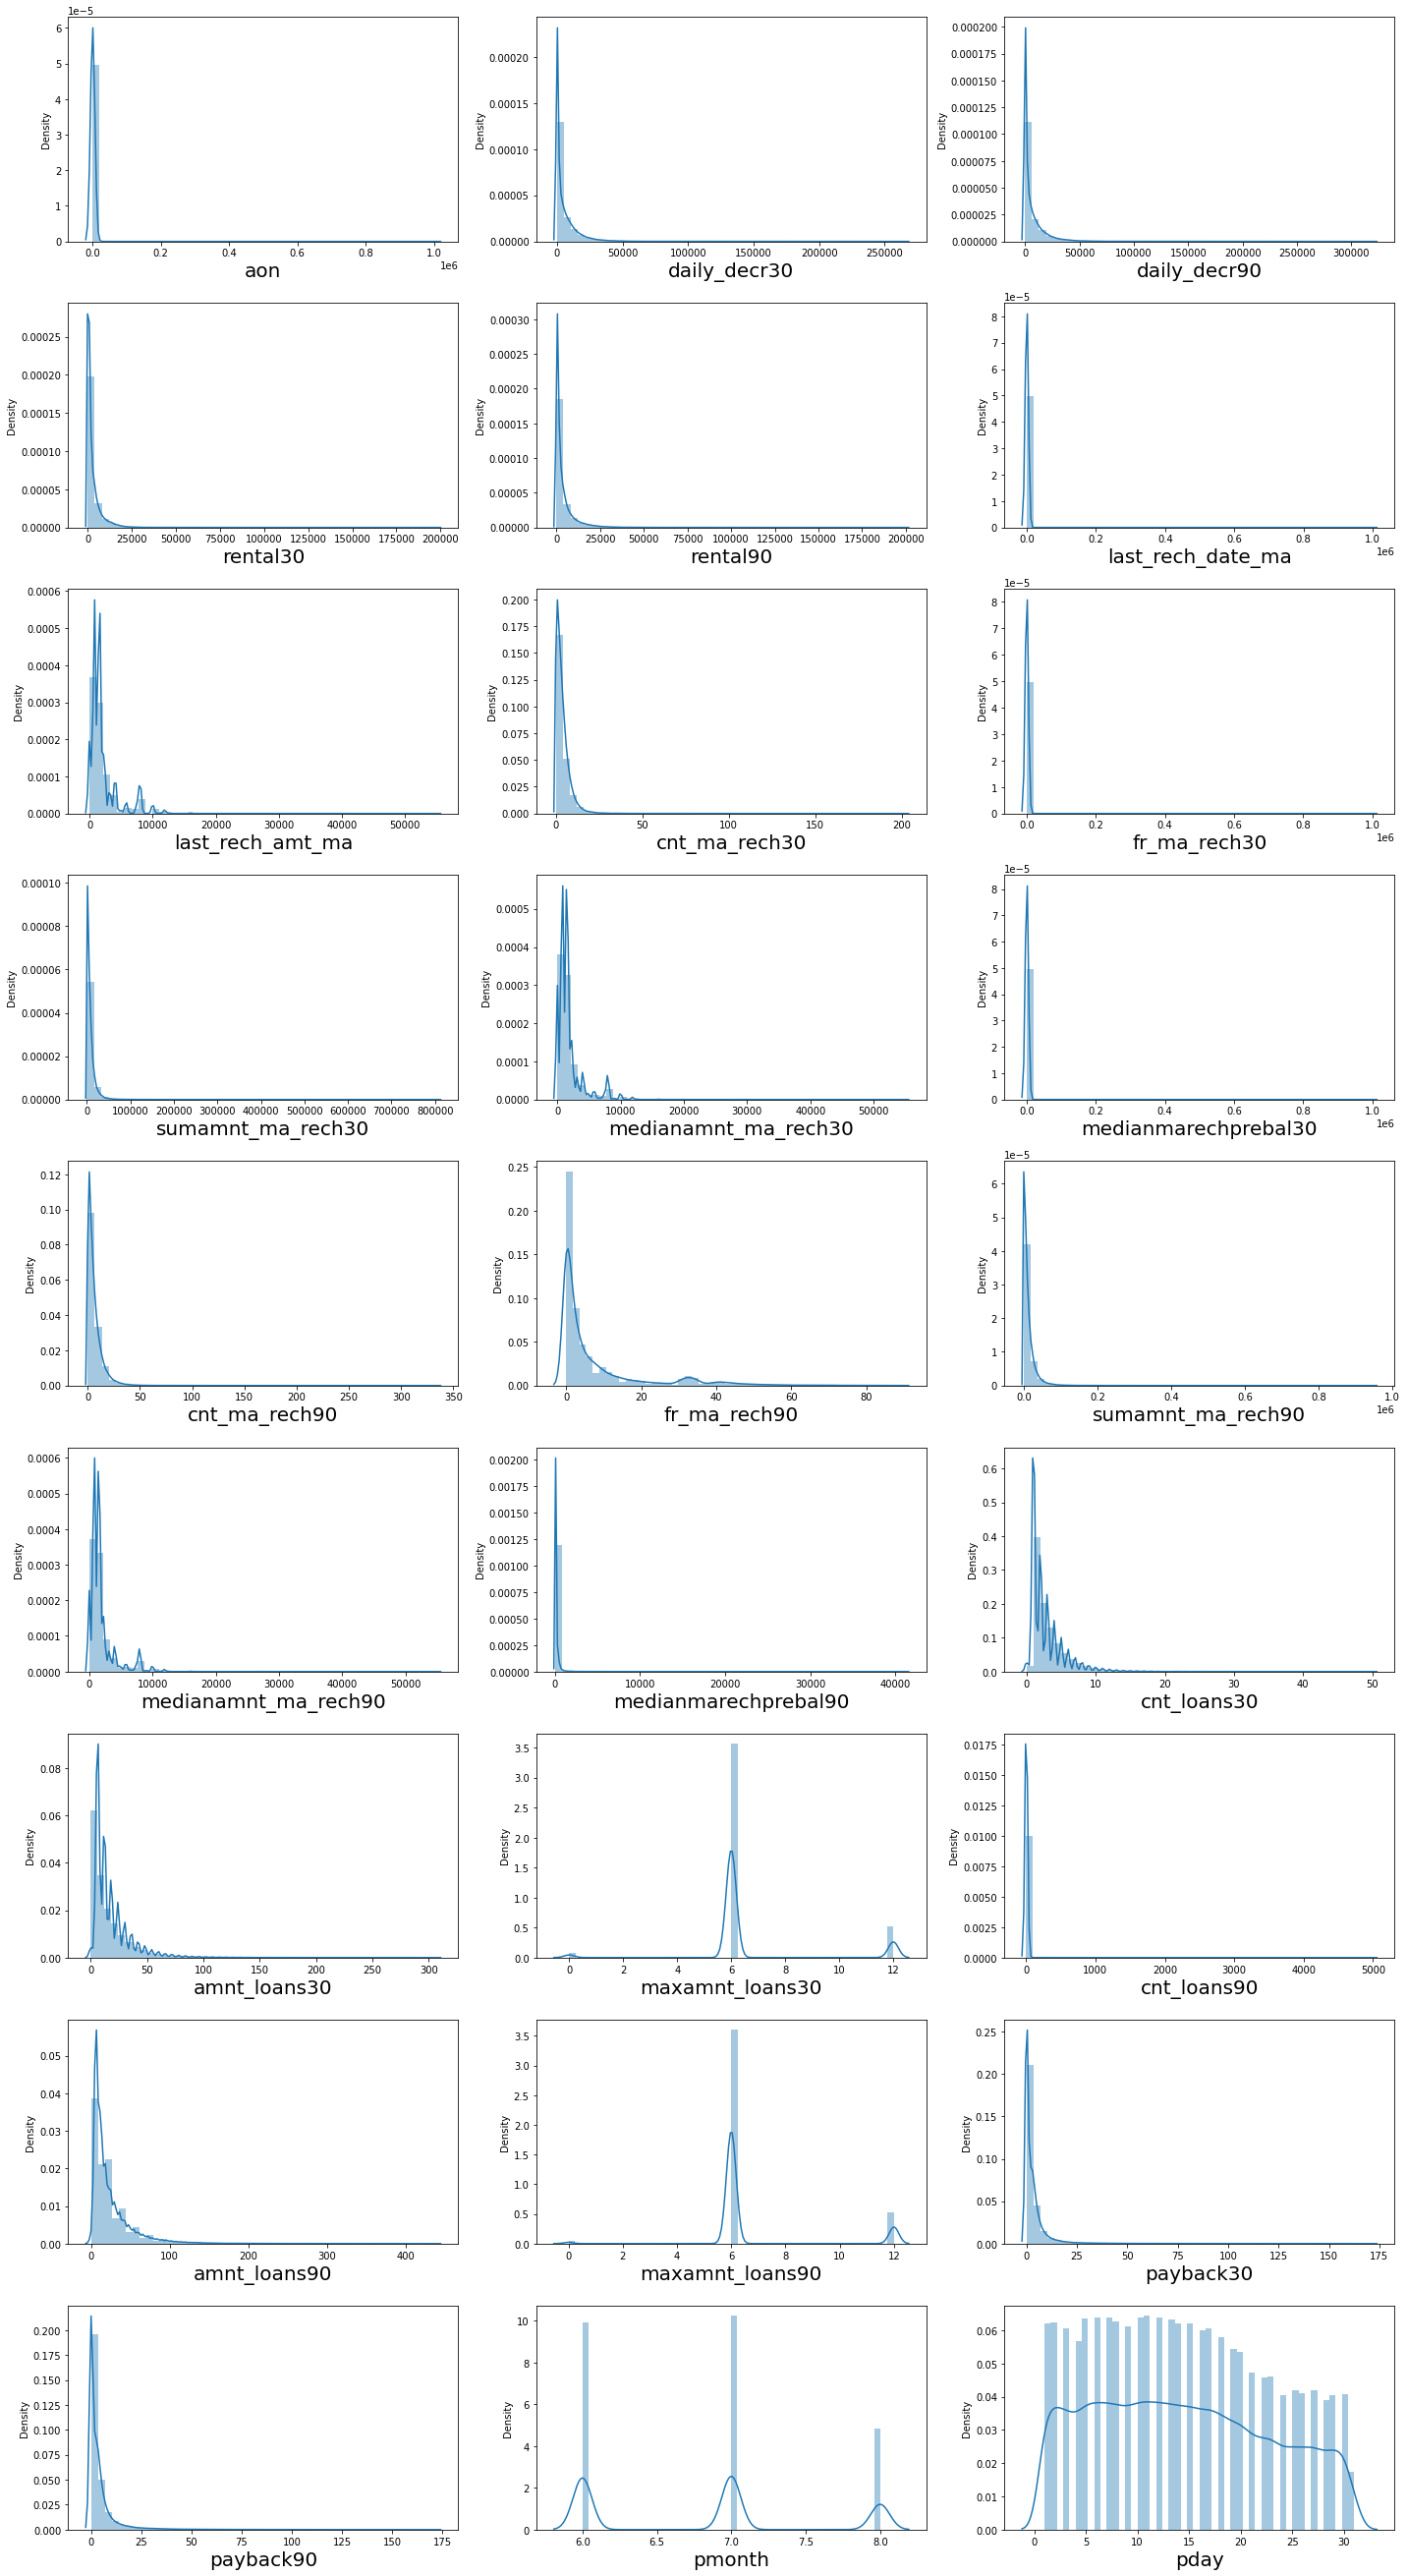

In [28]:
#Distribution plot for all numerical columns except label

plt.figure(figsize = (20,40))
plotnumber = 1
for column in df[col]:
    if plotnumber <=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

obsrvation:

it is showing us clearly that there are so much skewness in the dataset.

# Barivate Analysis:

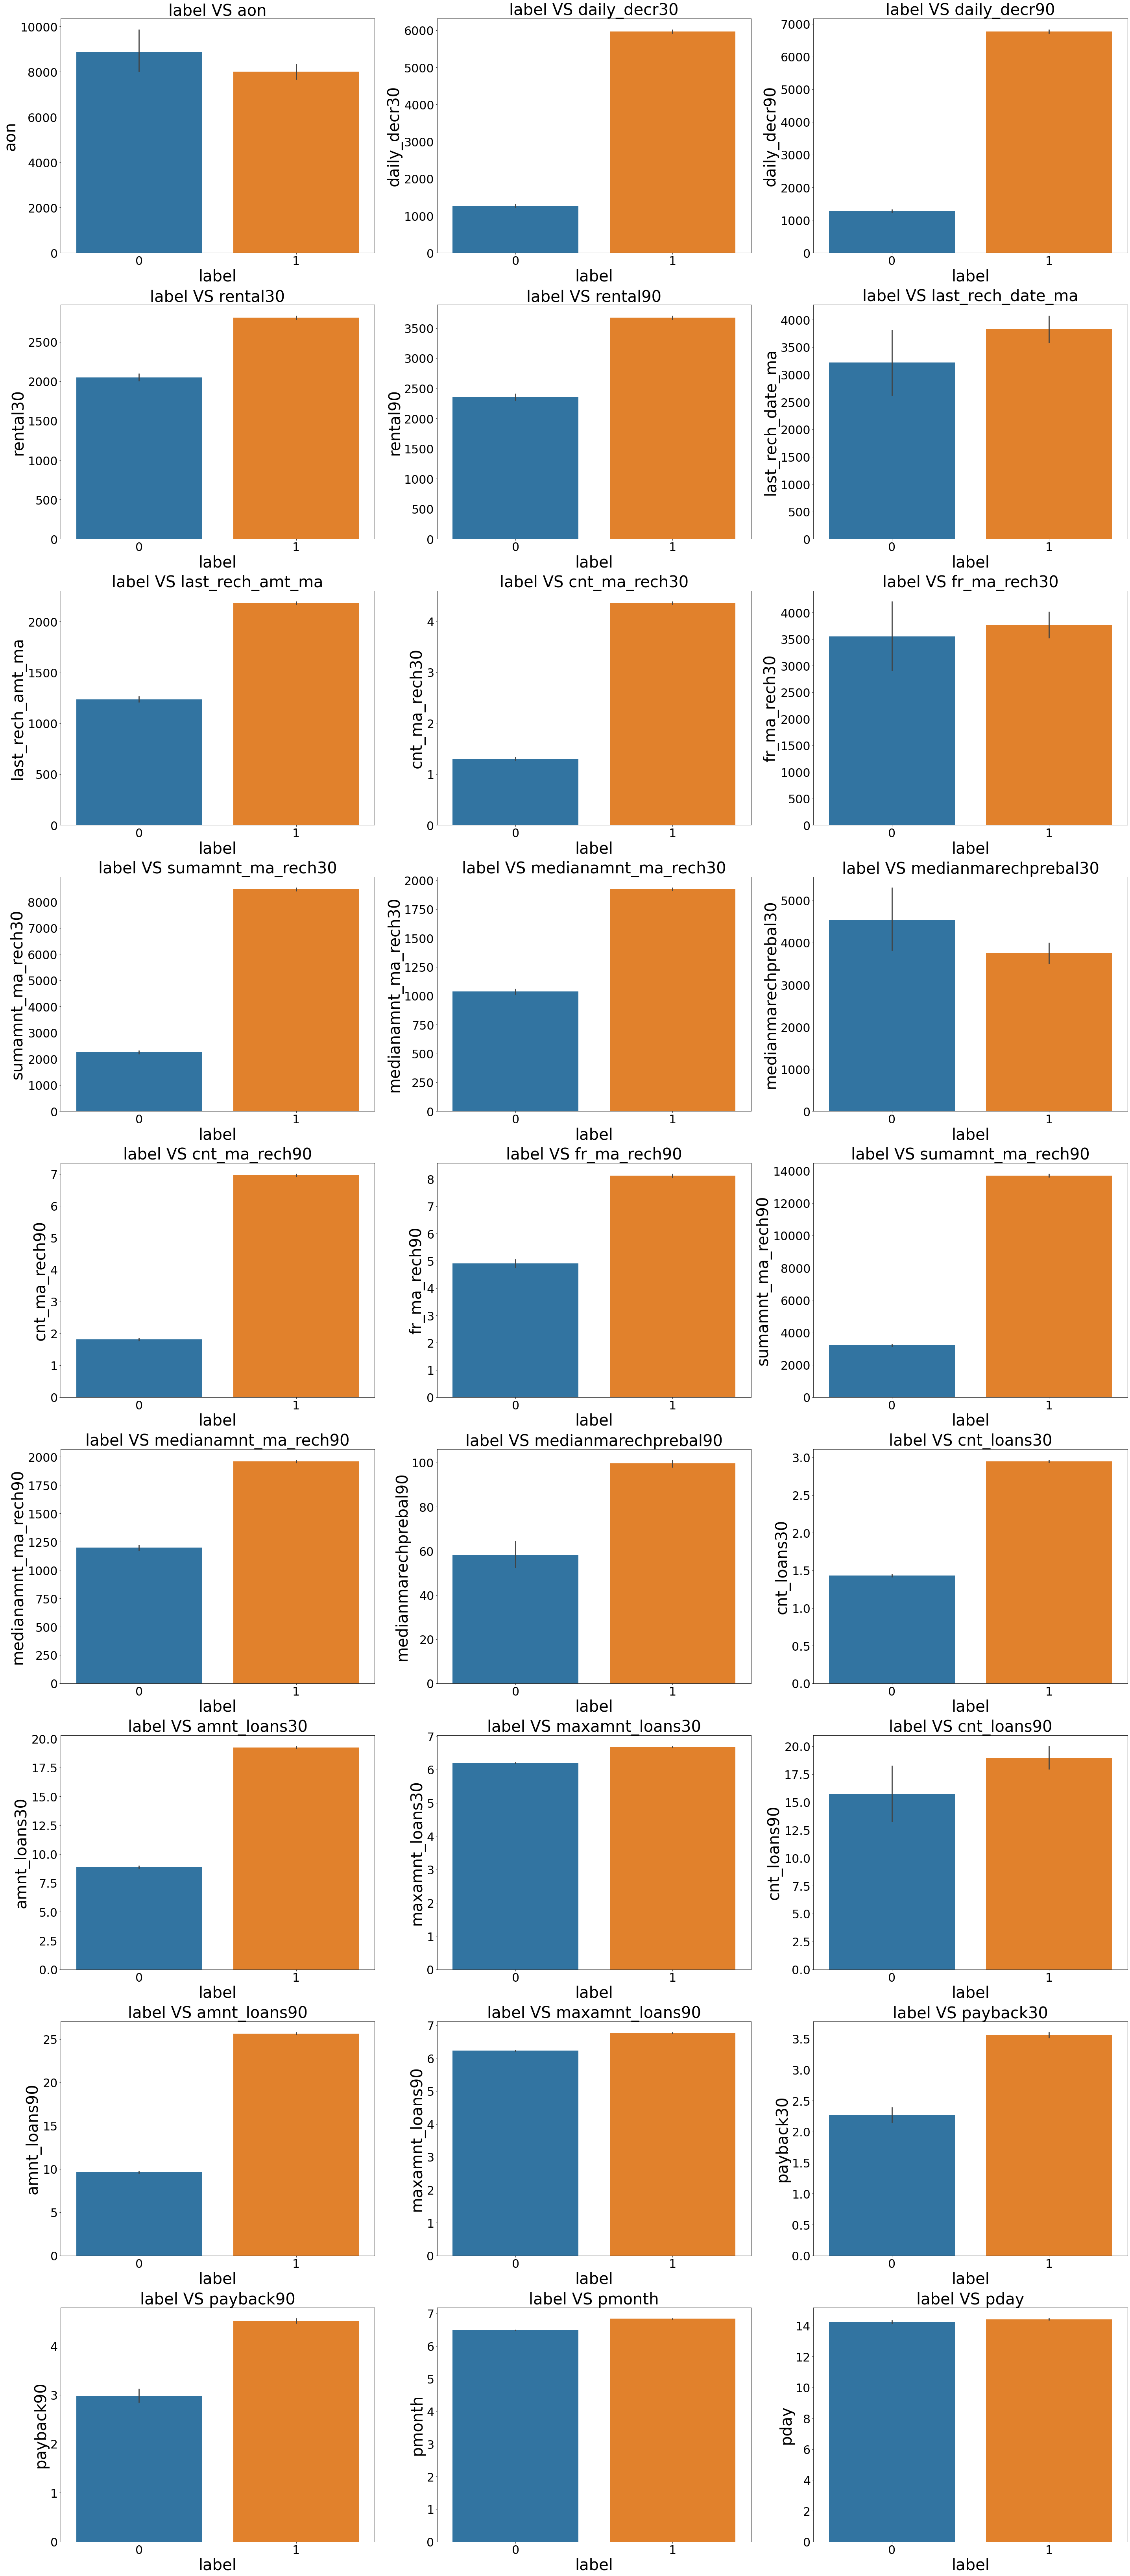

In [29]:
# barplot for numerical columns

plt.figure(figsize=(40,100))
for i in range(len(col)):
    plt.subplot(10,3,i+1)
    sns.barplot(x=df['label'], y=df[col[i]])
    plt.title(f"label VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)
    plt.xlabel('label',fontsize = 40)
    plt.ylabel(col[i],fontsize = 40)
    plt.tight_layout()

obseravtion:
    
high value of Age on cellular network in days(aon) are maximum defaulters(who have not paid there loan amount-0).

high value of Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)(daily_decr30) are maximum Non-defaulters(who have paid there loan amount-1).

high value of Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)(daily_decr90) are maximum Non-defaulters(who have paid there loan amount-1).

high value of Average main account balance over last 30 days(rental30) are maximum Non-defaulters(who have paid there loan amount-1).

high value of Average main account balance over last 90 days(rental90) are maximum Non-defaulters(who have paid there loan amount-1).

high Number of days till last recharge of main account(last_rech_date_ma) are maximum Non-defaulters(who have paid there loan amount-1).

high value of Amount of last recharge of main account (in Indonesian Rupiah)(last_rech_amt_ma) are maximum Non-defaulters(who have paid there loan amount-1).

high value of Number of times main account got recharged in last 30 days(cnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).

high value of Frequency of main account recharged in last 30 days(fr_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1) and also the count is high for defaulters comparitively Non-defaulters are more in number.

high value of Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)(sumamnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).

high value of Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)(medianamnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).

high value of Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)(medianmarechprebal30) are maximum defaulters(who have not paid there loan amount-0).

high value of Number of times main account got recharged in last 90 days(cnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).

high value of Frequency of main account recharged in last 90 days(fr_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).

high value of Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)(sumamnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).

high value of Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)(medianamnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).

high value of Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)(medianmarechprebal90) are maximum Non-defaulters(who have paid there loan amount-1).

high value of Number of loans taken by user in last 30 days(cnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).

high value of Total amount of loans taken by user in last 30 days(amnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).

high value of maximum amount of loan taken by the user in last 30 days(maxamnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).

high value of Number of loans taken by user in last 90 days(cnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).

high value of Total amount of loans taken by user in last 90 days(amnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).

high value of maximum amount of loan taken by the user in last 90 days(maxamnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).

high value of Average payback time in days over last 30 days(payback30) are maximum Non-defaulters(who have paid there loan amount-1).


# Data Cleaing:

# Checking for outliers:

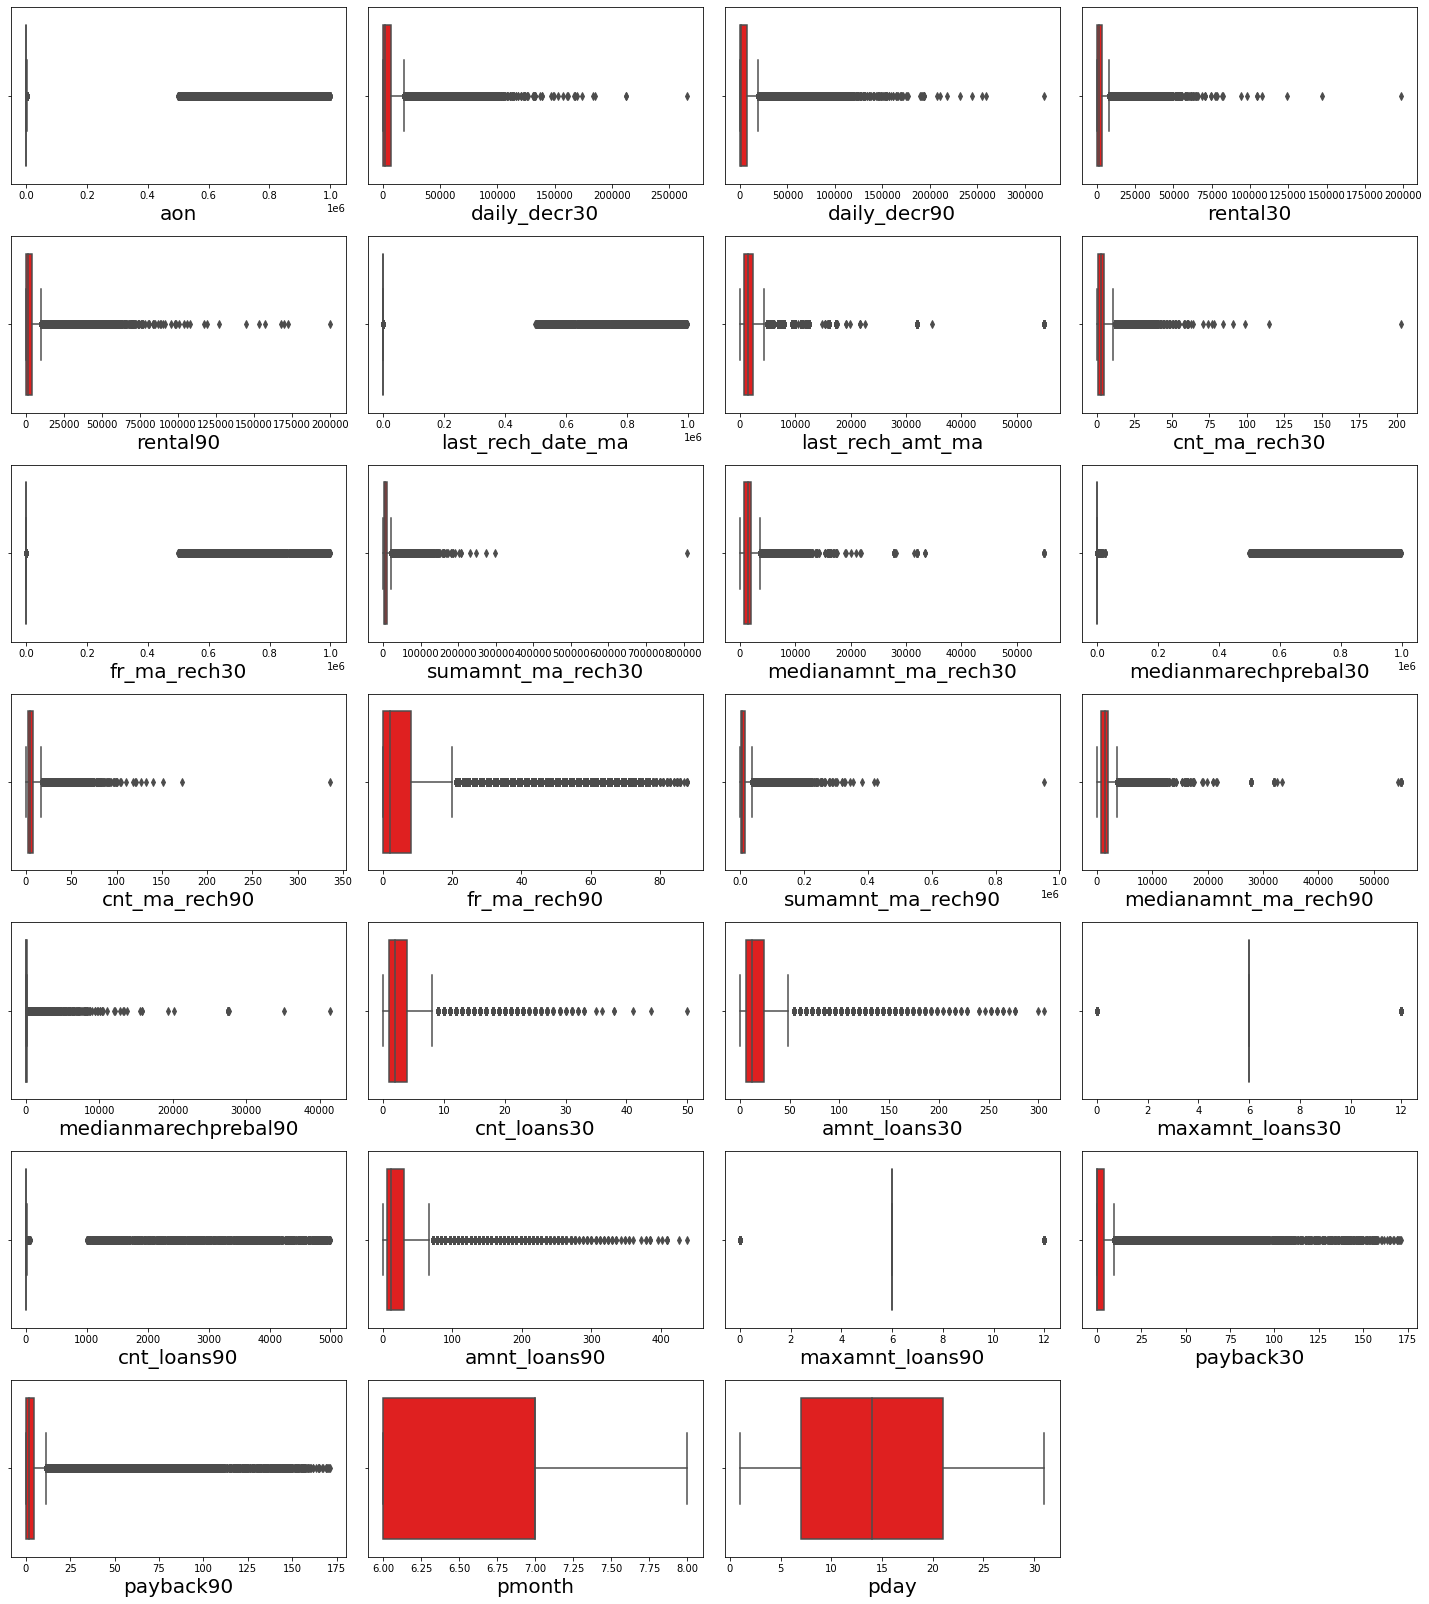

In [30]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for column in col:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

obseravtion:

here we can see the most of columns which is having outliers, only two columns which is not getting outliers

pmonth

pday

# Removing outliers:

In [31]:
# Features having outliers 

features=df[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90','amnt_loans90']]

In [32]:
# importing library

from scipy.stats import zscore

# removing ouliers 

z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]

obseravtion:

i have successfully removed outliers with the help of Z-SCORE method.

In [33]:
# checking new database after applying Zscore method

df_new.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,2,12,6.0,2.0,12,6,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,1,12,12.0,1.0,12,12,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,1,6,6.0,1.0,6,6,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,7,42,6.0,7.0,42,6,2.333333,2.333333,6,22


In [34]:
# checking size of new dataset

df_new.shape

(170212, 28)

In [35]:
#checking the size of old dataset

df.shape

(209593, 28)

In [36]:
# Checking dataloss in zscore method

Dataloss = (((209593-170212)/209593)*100)
print("Dataloss after applying Zscore method" , Dataloss)

Dataloss after applying Zscore method 18.789272542499035


observation:

here we can see the dataloss in getting more than 10% , so we should try another method

# percentile method:

In [37]:
#Removing outliers using percentile method

for cola in features:
    if df[cola].dtypes != 'object':
        percentile = df[cola].quantile([0.01,0.98]).values
        df[cola][df[cola]<=percentile[0]]=percentile[0]
        df[cola][df[cola]>=percentile[1]]=percentile[1]

i have successfully removed all the outliers with the percentile method, and i have already removed outlliers , so i am not going to use another method.

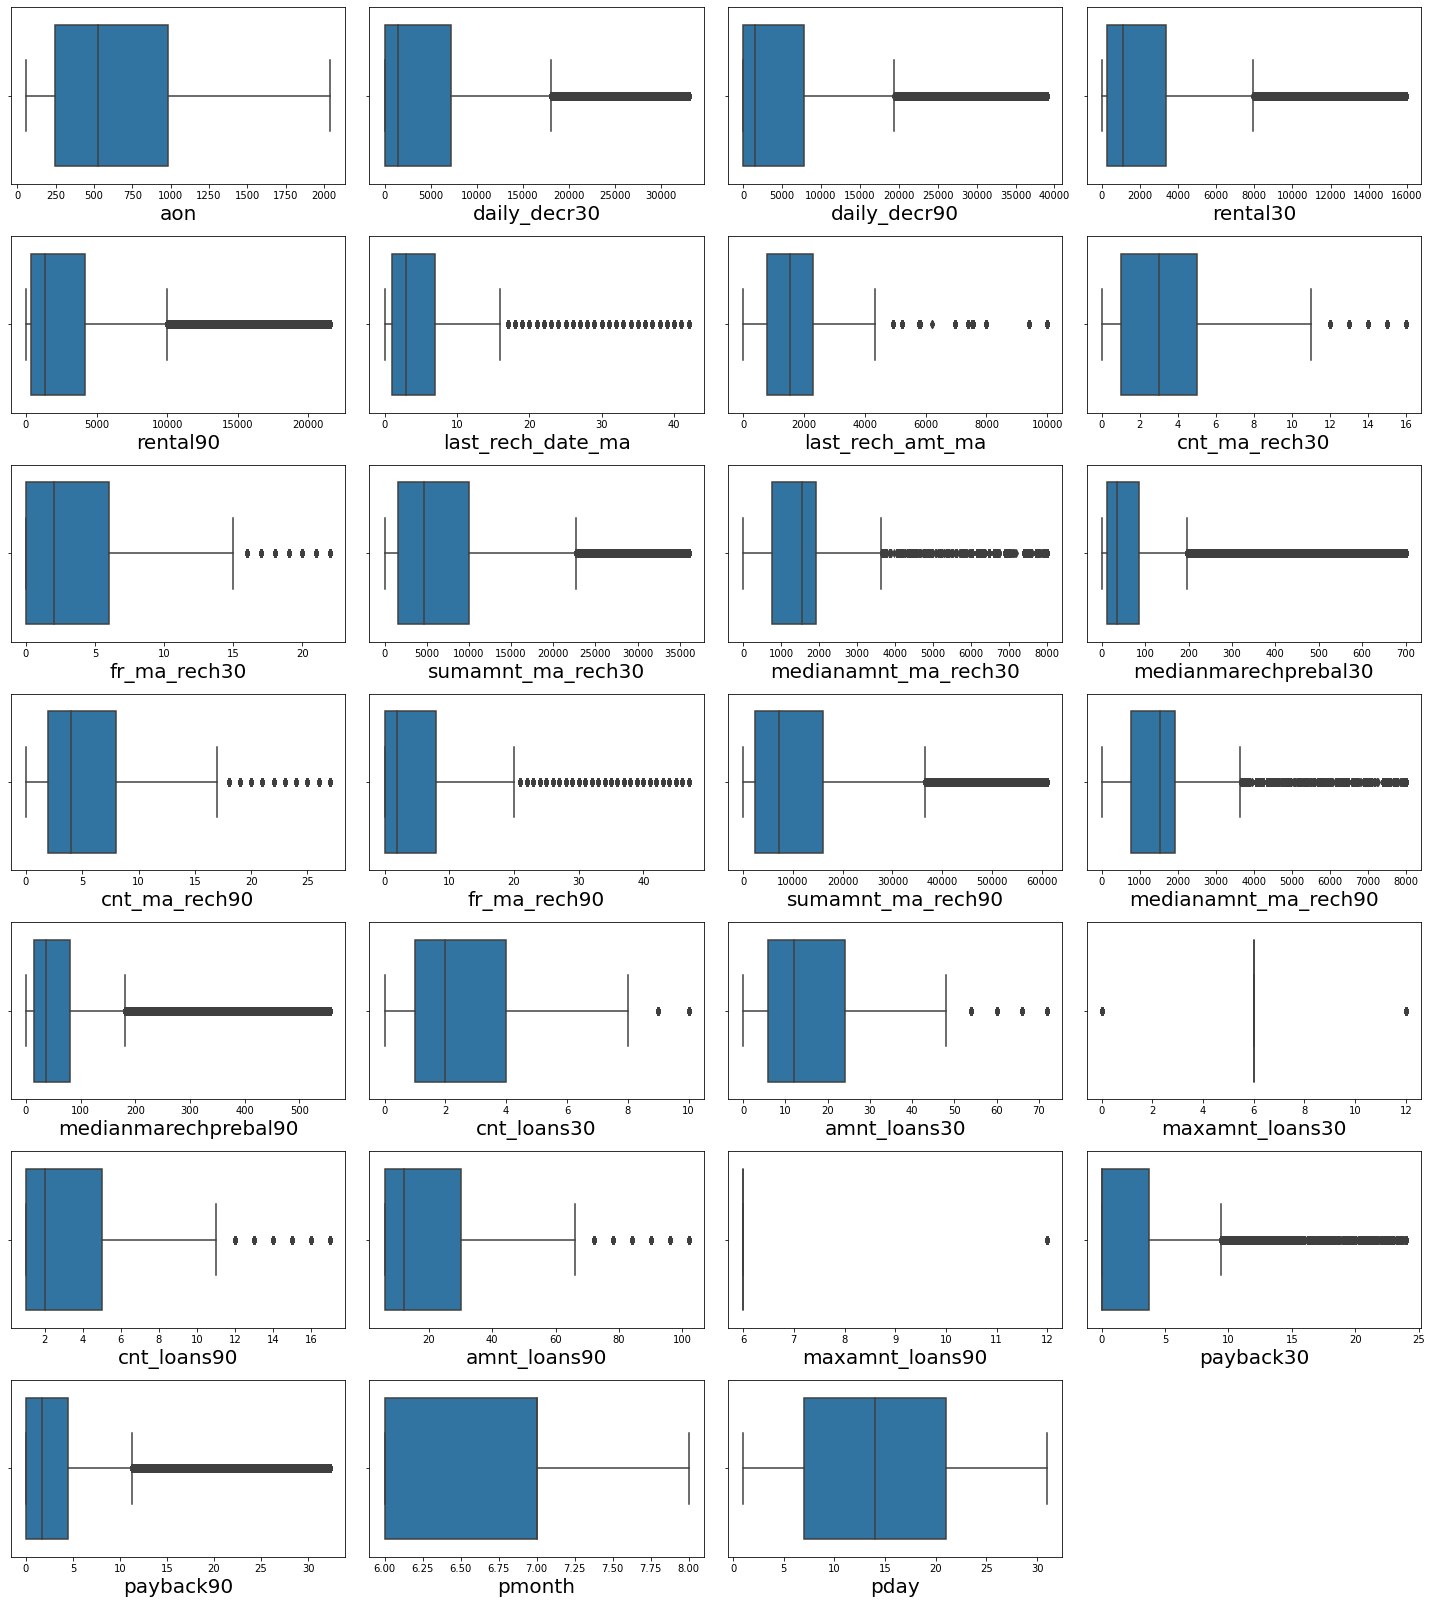

In [38]:
# Identifying the outliers again using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for column in col:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Here we can see the outliers is removed in all columns.

# Checking for skewness:

In [39]:
# let's checking for skewness:

df.skew()

label                  -2.270254
aon                     0.935197
daily_decr30            1.974398
daily_decr90            2.091663
rental30                2.115274
rental90                2.203455
last_rech_date_ma       2.541537
last_rech_amt_ma        2.080016
cnt_ma_rech30           1.415594
fr_ma_rech30            1.703205
sumamnt_ma_rech30       1.750999
medianamnt_ma_rech30    2.115971
medianmarechprebal30    2.812125
cnt_ma_rech90           1.569282
fr_ma_rech90            1.985638
sumamnt_ma_rech90       1.863547
medianamnt_ma_rech90    2.133303
medianmarechprebal90    2.639138
cnt_loans30             1.576547
amnt_loans30            1.733837
maxamnt_loans30         1.241879
cnt_loans90             1.923139
amnt_loans90            1.840032
maxamnt_loans90         2.241299
payback30               2.648819
payback90               2.829305
pmonth                  0.343242
pday                    0.199845
dtype: float64

# Remoivng outliers using yeo-johnson method:

obseravtion:

Here we can see most of the columns is havng skewness , so it should be removed otherwise that will create problem while creating error.

In [40]:
# Creating a list of skewed features

fea=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']

# importing required libraries and applying method

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

i have removed all of the skewness using of yeo jhnson method

In [41]:
df[fea] = scaler.fit_transform(df[fea].values)

In [42]:
# Checking skewness again

df[fea].skew()

aon                    -0.059160
daily_decr30           -0.141351
daily_decr90           -0.130982
rental30               -0.063274
rental90               -0.063135
last_rech_date_ma       0.044329
last_rech_amt_ma       -0.096659
cnt_ma_rech30          -0.010127
fr_ma_rech30            0.133182
sumamnt_ma_rech30      -0.369884
medianamnt_ma_rech30   -0.239052
medianmarechprebal30   -0.045899
cnt_ma_rech90          -0.012068
fr_ma_rech90            0.140655
sumamnt_ma_rech90      -0.265438
medianamnt_ma_rech90   -0.100228
medianmarechprebal90   -0.029268
cnt_loans30             0.042626
amnt_loans30            0.006048
maxamnt_loans30         0.422682
cnt_loans90             0.206928
amnt_loans90            0.133935
maxamnt_loans90         0.000000
payback30               0.287988
payback90               0.201580
dtype: float64

obseravtion:

here we can see skewness is removed

# Checking correlation :

In [43]:
# checking the correlation

cor = df.corr()
cor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
label,1.000000,0.096267,0.267056,0.269522,0.142204,0.156705,0.065764,0.261558,0.344106,0.241559,0.358799,0.277643,0.264868,0.361987,0.220134,0.368684,0.252438,0.256673,0.234579,0.233895,0.061726,0.287740,0.302689,0.099686,0.232627,0.240341,0.154949,0.006825
aon,0.096267,1.000000,0.115717,0.116326,0.083372,0.091223,0.062095,0.097955,0.037108,0.069588,0.080562,0.097277,0.057026,0.058066,0.075321,0.097926,0.103318,0.058464,0.073933,0.074585,0.031733,0.116080,0.118641,0.038817,0.081135,0.111311,0.086131,0.016448
daily_decr30,0.267056,0.115717,1.000000,0.998328,0.583840,0.640817,0.124668,0.376118,0.495417,0.296000,0.554458,0.388880,0.274642,0.627033,0.219822,0.663845,0.366157,0.244357,0.341657,0.394816,0.298745,0.517784,0.571143,0.403148,0.328779,0.404245,0.816993,-0.009166
daily_decr90,0.269522,0.116326,0.998328,1.000000,0.584062,0.645831,0.128715,0.375746,0.490856,0.295068,0.549137,0.385740,0.273267,0.630612,0.220905,0.666929,0.366491,0.245195,0.335047,0.388839,0.297566,0.518885,0.572560,0.406070,0.326097,0.404871,0.830246,-0.016237
rental30,0.142204,0.083372,0.583840,0.584062,1.000000,0.973267,0.054789,0.284288,0.454494,0.248022,0.481511,0.322414,0.224414,0.509933,0.161965,0.518253,0.272765,0.179244,0.311012,0.341526,0.210885,0.417471,0.447287,0.276141,0.307758,0.342924,0.417779,0.101982
rental90,0.156705,0.091223,0.640817,0.645831,0.973267,1.000000,0.088574,0.295280,0.445557,0.249853,0.470255,0.313758,0.220681,0.537415,0.175607,0.544569,0.283442,0.188766,0.294167,0.329390,0.217492,0.435248,0.468701,0.302381,0.304173,0.359453,0.505501,0.084642
last_rech_date_ma,0.065764,0.062095,0.124668,0.128715,0.054789,0.088574,1.000000,0.517311,-0.021157,0.057784,0.114665,0.324497,0.188150,0.095034,0.218692,0.249151,0.507089,0.336528,-0.106417,-0.107861,-0.021712,-0.032599,-0.028060,0.013783,-0.099599,-0.026865,0.076522,0.031441
last_rech_amt_ma,0.261558,0.097955,0.376118,0.375746,0.284288,0.295280,0.517311,1.000000,0.321219,0.271814,0.652559,0.811083,0.426718,0.373169,0.336927,0.701542,0.902139,0.490801,0.144867,0.164279,0.132987,0.211549,0.240275,0.183079,0.143458,0.180046,0.154444,0.057765
cnt_ma_rech30,0.344106,0.037108,0.495417,0.490856,0.454494,0.445557,-0.021157,0.321219,1.000000,0.418862,0.857121,0.415131,0.484221,0.920818,0.220237,0.778120,0.286052,0.388709,0.700620,0.697461,0.181981,0.706690,0.719248,0.195099,0.546511,0.488965,0.192337,0.097636
fr_ma_rech30,0.241559,0.069588,0.296000,0.295068,0.248022,0.249853,0.057784,0.271814,0.418862,1.000000,0.460805,0.381173,0.306109,0.410987,0.613784,0.421736,0.291046,0.225408,0.298338,0.283388,0.092388,0.350050,0.361689,0.102132,0.413674,0.392590,0.131977,0.080686


observation:
    
Here we can see the correlation, but we will see correlation using heatmap for better visualization    

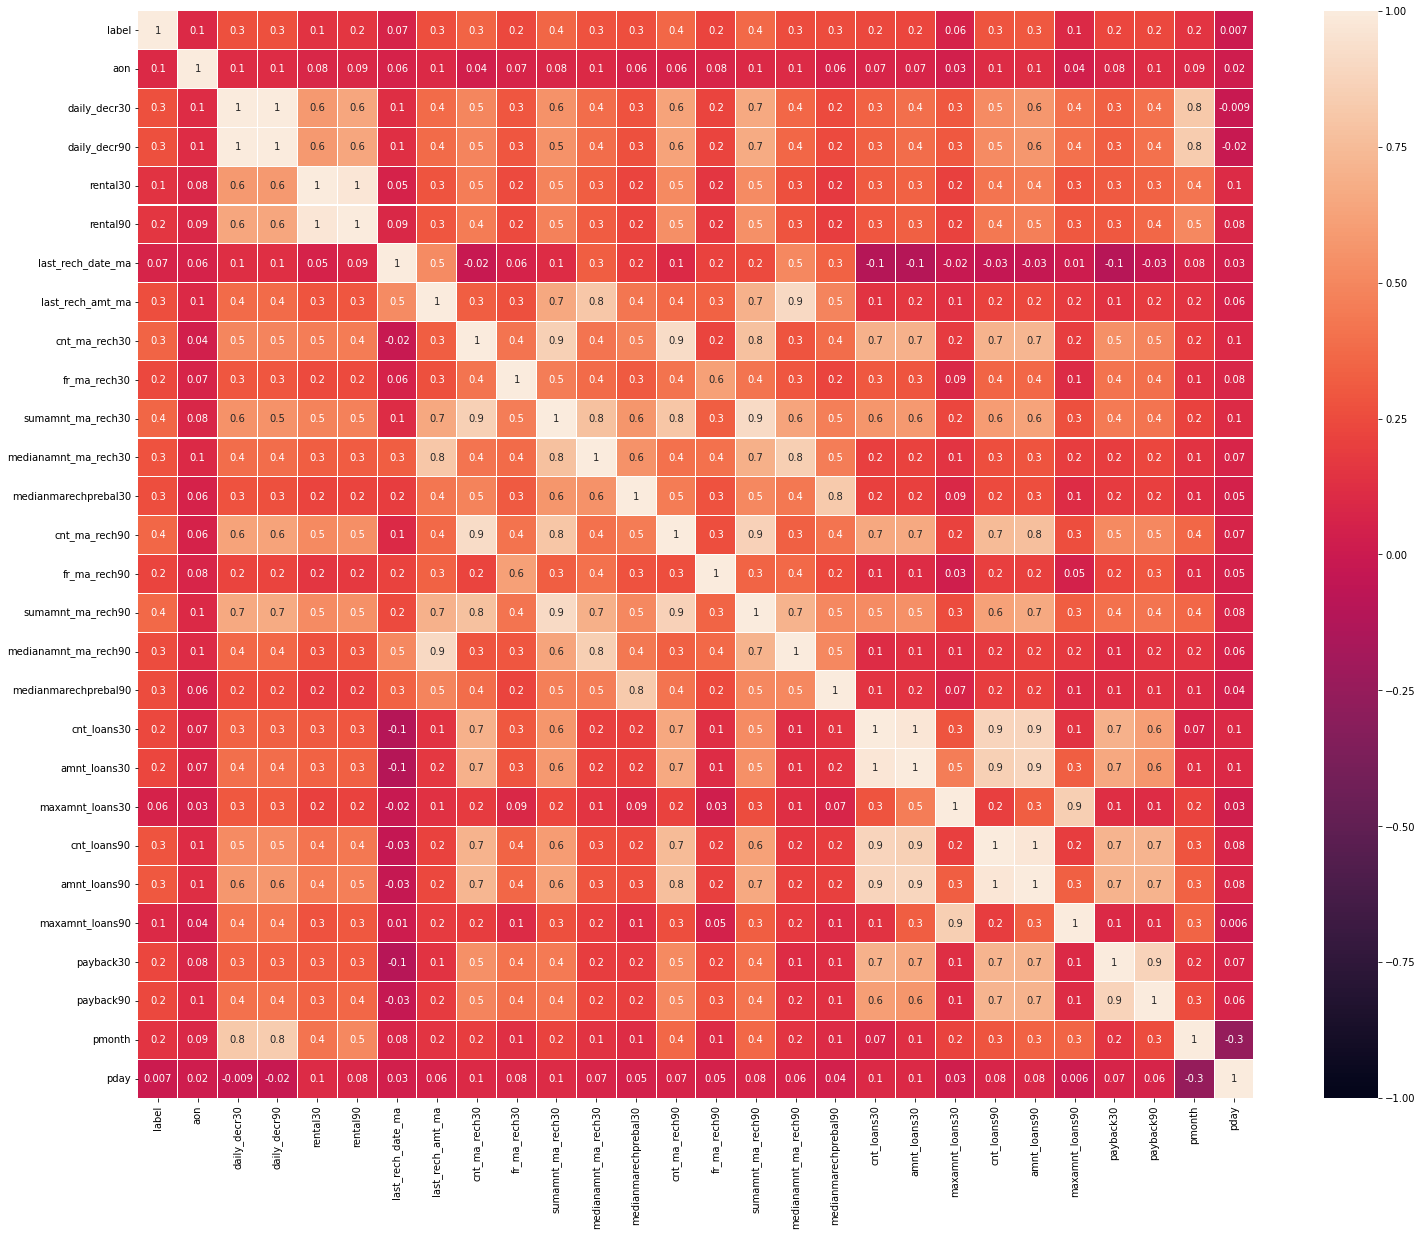

In [44]:
# Visualizing the correlation matrix by plotting heat map.

plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True,annot_kws={'size':10})
plt.yticks(rotation=0);

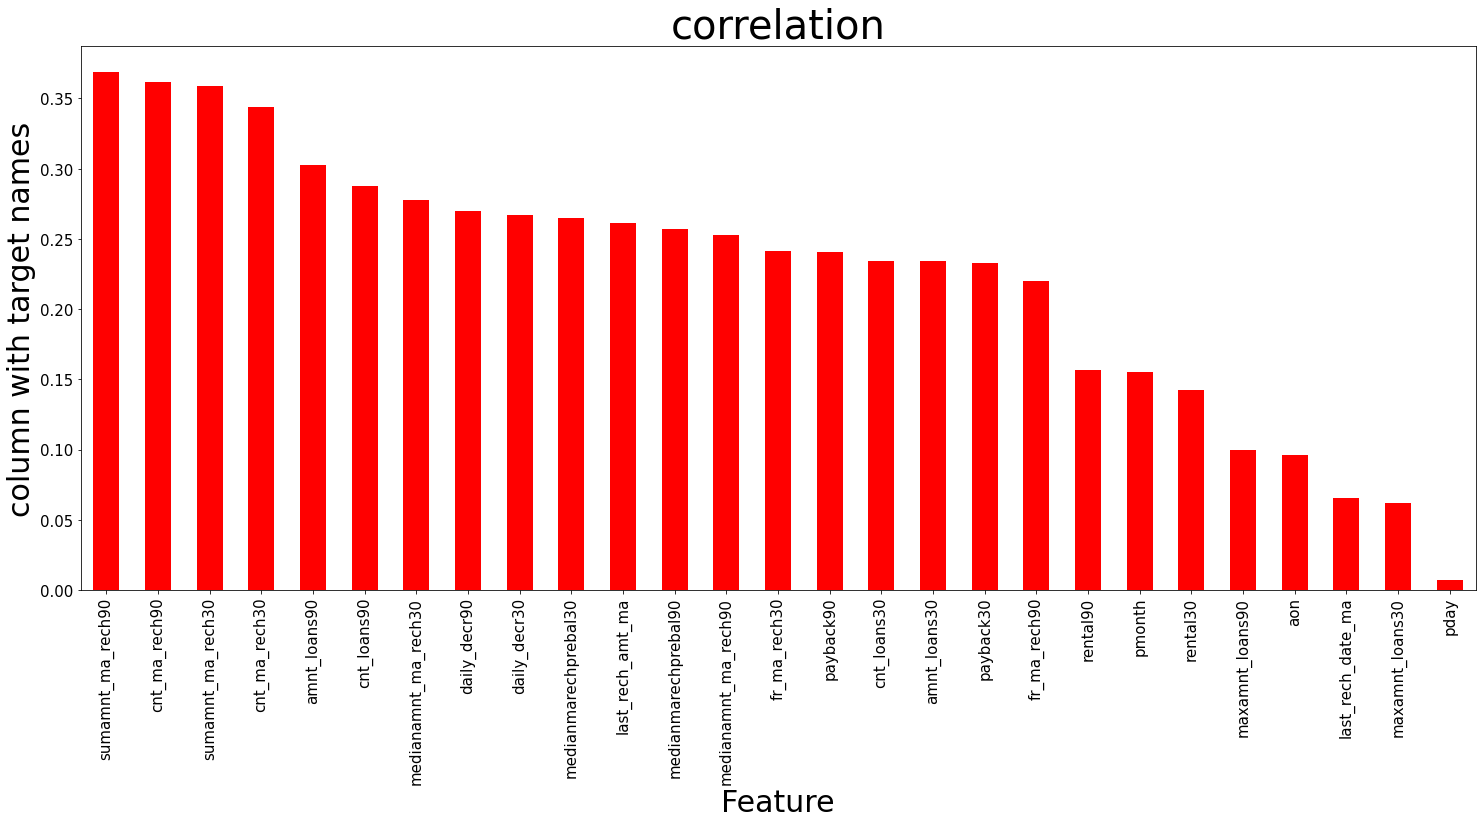

In [45]:
# Now we will visualize all columns with the target columns

plt.figure(figsize=(25,10))
df.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=30)
plt.ylabel('column with target names',fontsize=30)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.title('correlation',fontsize=40)
plt.show()

obseravtion:

here we can see there is not any negligible correlation , so we can procced 

# Seprating features and target:

In [46]:
x = df.drop("label",axis = 1)
y = df["label"]

i have seprated target columns and independent columns

In [47]:
x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,-0.696438,0.494127,0.471080,-0.816943,-0.806214,-0.339490,0.081985,-0.292754,1.713444,-0.192082,0.210453,-0.731853,-0.592539,1.341883,-0.459913,0.147199,-0.861667,0.005250,-0.105640,-0.245447,-0.182317,-0.195308,-1.948303e-13,1.785799,1.821484,7,20
1,0.388296,1.119747,1.071452,0.788861,0.623891,1.533669,1.531119,-0.813308,-1.125020,0.221233,1.693348,0.382067,-1.036320,-1.206931,-0.096105,1.751936,0.358453,-0.917748,-0.105640,2.301616,-1.129610,-0.195308,1.340081e-12,-0.938528,-1.019522,8,10
2,0.042606,0.177645,0.162866,-0.127096,-0.225085,-0.011661,0.081985,-0.813308,-1.125020,-0.559381,0.210453,0.434226,-1.036320,-1.206931,-0.785812,0.147199,0.417502,-0.917748,-0.905221,-0.245447,-1.129610,-1.184033,-1.948303e-13,-0.938528,-1.019522,8,19
3,-0.817739,-1.127276,-1.124934,-0.949309,-1.000258,2.035072,-0.297745,-1.676293,-1.125020,-1.899447,-1.962023,-1.651468,-1.036320,-1.206931,-0.976052,-0.264481,-1.291484,0.005250,-0.105640,-0.245447,-0.182317,-0.195308,-1.948303e-13,-0.938528,-1.019522,6,6
4,0.754834,-0.592438,-0.592181,-0.012681,-0.118293,0.229214,0.454627,1.016428,0.160683,1.323060,0.589603,-0.058536,0.664361,-0.062417,1.014437,0.808981,-0.015649,1.608532,1.499492,-0.245447,1.235280,1.166897,-1.948303e-13,0.640306,0.428035,6,22


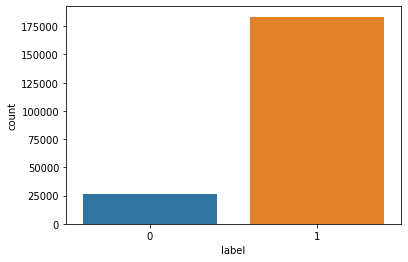

In [48]:
# lets check balacing status for target column

sns.countplot(df['label'])

obseravtion:

Now here we can see our dataset is not balanced , and it is having imbalanced issue so firstlly we need to shortout with resampling , and oversampling.

# Balancing the target column :

In [49]:
#Checking the value count of target column

y.value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [50]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [51]:
# Checking the value counts again

y.value_counts()

0    183431
1    183431
Name: label, dtype: int64

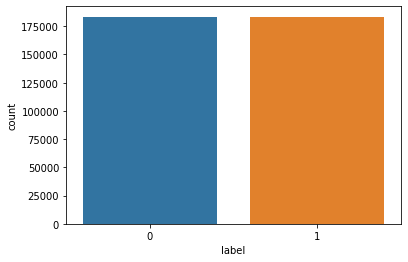

In [52]:
# Visualizing the target data after oversampling

sns.countplot(y)

# scalling data:

In [53]:
# using sclar and importing necessary libraries

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)

# Finding Best Random Accuracy:

In [54]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [55]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = DecisionTreeClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is = ",maxAccu," on Random_state = ",maxRS)

Best accuracy is =  0.9120108305545207  on Random_state =  65


In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

# Classification Algorithm:

In [57]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score

# XGB classifer:

In [58]:
XGB=XGBClassifier(verbosity=0)
XGB.fit(X_train,y_train)
predxg=XGB.predict(X_test)
Accuracy_Score = accuracy_score(y_test, predxg)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, predxg))
print(classification_report(y_test,predxg))

#cross validation score
scores = cross_val_score(XGB, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 89.49745136699406
Confusion Matrix: [[50427  4708]
 [ 6851 48073]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     55135
           1       0.91      0.88      0.89     54924

    accuracy                           0.89    110059
   macro avg       0.90      0.89      0.89    110059
weighted avg       0.90      0.89      0.89    110059


Cross validation score : 88.99450949501858
\Accuracy_Score - Cross Validation Score : 0.5029418719754801


# k-neighbour classifier:

In [59]:
knn=KNN()
knn.fit(X_train,y_train)
predkn=knn.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predkn))
print('Confusion Matrix:',confusion_matrix(y_test, predkn))
print(classification_report(y_test,predkn))

Accuracy Score: 0.8951289762763609
Confusion Matrix: [[54166   969]
 [10573 44351]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.90     55135
           1       0.98      0.81      0.88     54924

    accuracy                           0.90    110059
   macro avg       0.91      0.89      0.89    110059
weighted avg       0.91      0.90      0.89    110059



# Gradient Boosting Classifier:

In [60]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
predgb=GBC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.902470493099156
Confusion Matrix: [[50476  4659]
 [ 6075 48849]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     55135
           1       0.91      0.89      0.90     54924

    accuracy                           0.90    110059
   macro avg       0.90      0.90      0.90    110059
weighted avg       0.90      0.90      0.90    110059



# Decision Tree Classifier:

In [61]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
preddt=DTC.predict(X_test)
Accuracy_Score = accuracy_score(y_test, preddt)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

#cross validation score
scores = cross_val_score(DTC, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 91.21743791966126
Confusion Matrix: [[50610  4525]
 [ 5141 49783]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     55135
           1       0.92      0.91      0.91     54924

    accuracy                           0.91    110059
   macro avg       0.91      0.91      0.91    110059
weighted avg       0.91      0.91      0.91    110059


Cross validation score : 90.86033865734093
\Accuracy_Score - Cross Validation Score : 0.3570992623203324


# ADA - Booster Classifier:

In [62]:
ABC=AdaBoostClassifier()
ABC.fit(X_train,y_train)
predab=ABC.predict(X_test)
Accuracy_Score = accuracy_score(y_test, predab)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, predab))
print(classification_report(y_test,predab))

#cross validation score
scores = cross_val_score(ABC, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 85.37329977557492
Confusion Matrix: [[48031  7104]
 [ 8994 45930]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86     55135
           1       0.87      0.84      0.85     54924

    accuracy                           0.85    110059
   macro avg       0.85      0.85      0.85    110059
weighted avg       0.85      0.85      0.85    110059


Cross validation score : 84.99681828839691
\Accuracy_Score - Cross Validation Score : 0.3764814871780118


# Bagging classifier:

In [63]:
BC=BaggingClassifier()
BC.fit(X_train,y_train)
predbc=BC.predict(X_test)
Accuracy_Score = accuracy_score(y_test, predbc)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, predbc))
print(classification_report(y_test,predbc))

#cross validation score
scores = cross_val_score(BC, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 93.62796318338346
Confusion Matrix: [[52304  2831]
 [ 4182 50742]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     55135
           1       0.95      0.92      0.94     54924

    accuracy                           0.94    110059
   macro avg       0.94      0.94      0.94    110059
weighted avg       0.94      0.94      0.94    110059


Cross validation score : 93.34056275686656
\Accuracy_Score - Cross Validation Score : 0.28740042651689635


# Roc AUC Curve:

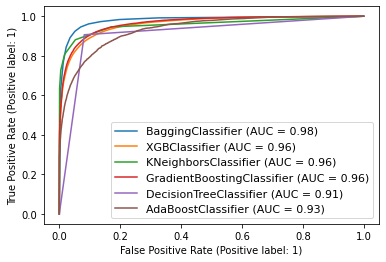

In [64]:
# Plotting ROC for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(BC,X_test,y_test)
plot_roc_curve(XGB, X_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, X_test, y_test, ax=disp.ax_)
plot_roc_curve(GBC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, X_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Above is the ROC curves for all the models that i have predicted.And the AUC values can also be seen in the plot.

AUC value is high for XGBClassifier and BaggingClassifier.I got least difference in model accuracy and cross validation score for BaggingClassifier so BC is my best model.

#HYPER PARAMETER TUNING:

In [65]:
#importing necessary libraries

from sklearn.model_selection import GridSearchCV

In [66]:
parameter = {'bootstrap':['True','False'],
             'n_jobs': [-2,-1,1,2],
             'n_estimators':[10,20,30,40],
             'warm_start':['True','False']}

In [67]:
GCV=GridSearchCV(BaggingClassifier(),parameter,cv=5)

now we are training the model with GCV

In [68]:
Final_mod=BaggingClassifier(bootstrap='True', n_jobs=-1,warm_start='True', n_estimators=40)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print('Accuracy Score is:',(accuracy_score(y_test,pred)*100))
print('Confusion matrix is:',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score is: 94.35938905496143
Confusion matrix is: [[52220  2915]
 [ 3293 51631]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     55135
           1       0.95      0.94      0.94     54924

    accuracy                           0.94    110059
   macro avg       0.94      0.94      0.94    110059
weighted avg       0.94      0.94      0.94    110059



#AUC ROC curve for final model

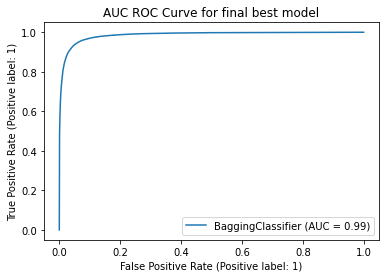

In [69]:
#Ploting ROC curve for final best model

plot_roc_curve(Final_mod, X_test, y_test)
plt.title('AUC ROC Curve for final best model')
plt.show()

#MODEL SAVING:

In [70]:
#Saving the model as .pkl file

import joblib
joblib.dump(Final_mod,"MicroCreditLoan.pkl")

['MicroCreditLoan.pkl']

#PREDICTION:

In [71]:
# Loading the saved model
model=joblib.load("MicroCreditLoan.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([1, 0, 1, ..., 1, 1, 1])

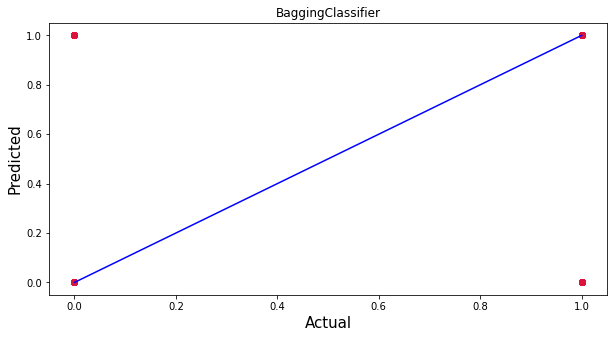

In [72]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("BaggingClassifier")
plt.show()

# Thank you :)